In [39]:
import psycopg2
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sb
import seaborn as sns
import matplotlib.patches as patches
import matplotlib.path as path
import statsmodels.api as sm

sns.set_style("darkgrid")
%matplotlib inline

In [23]:
connection = psycopg2.connect(database="regressiondata", host="lapisco2.fortaleza.ifce.edu.br", port=3432, user="conceptu", password="conceptu@ifce")

In [24]:
cursor = connection.cursor()

In [48]:
cursor.execute("""SELECT *  FROM timeseries;""")
fetch = cursor.fetchall()
timeseries_description = [i[0] for i in cursor.description]
timeseries_table = pd.DataFrame(fetch,columns= timeseries_description)
display(timeseries_table.head())


,id,created_at,updated_at,occurred_at,consumption_points,power_factor,total_consumption,power_plant_id,under_maintenance
0,3680,2022-08-14 22:55:27.774803-03:00,2022-08-14 22:55:27.774803-03:00,2021-05-26,"[1.0, None, None, None, None, None, None, None...","[-0.97, None, None, None, None, None, None, No...",930.0,2920,None
1,3681,2022-08-14 22:55:27.789920-03:00,2022-08-14 22:55:27.789920-03:00,2021-05-27,"[0.25, None, None, None, None, None, None, Non...","[-0.83, None, None, None, None, None, None, No...",980.0,2920,None
2,3682,2022-08-14 22:55:27.808443-03:00,2022-08-14 22:55:27.808443-03:00,2021-05-28,"[0.27, None, None, None, None, None, None, Non...","[-0.78, None, None, None, None, None, None, No...",903.0,2920,None
3,3683,2022-08-14 22:55:27.825419-03:00,2022-08-14 22:55:27.825419-03:00,2021-05-29,"[0.22, None, None, None, None, None, None, Non...","[-0.73, None, None, None, None, None, None, No...",58.0,2920,None
4,3684,2022-08-14 22:55:27.841074-03:00,2022-08-14 22:55:27.841074-03:00,2021-05-30,"[0.46, None, None, None, None, None, None, Non...","[-0.91, None, None, None, None, None, None, No...",35.0,2920,None


In [55]:
timeseries_table.describe()

,id,total_consumption,power_plant_id
count,333.000000,333.000000,333.0
mean,3821.000000,734.651652,2920.0
std,96.273049,492.691892,0.0
min,3655.000000,8.000000,2920.0
25%,3738.000000,53.000000,2920.0
50%,3821.000000,975.000000,2920.0
75%,3904.000000,1130.000000,2920.0
max,3987.000000,1582.000000,2920.0


In [26]:
ocurrent_month = timeseries_table['occurred_at']
consumption_total = timeseries_table['total_consumption']


/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


<Figure size 2000x1000 with 0 Axes>

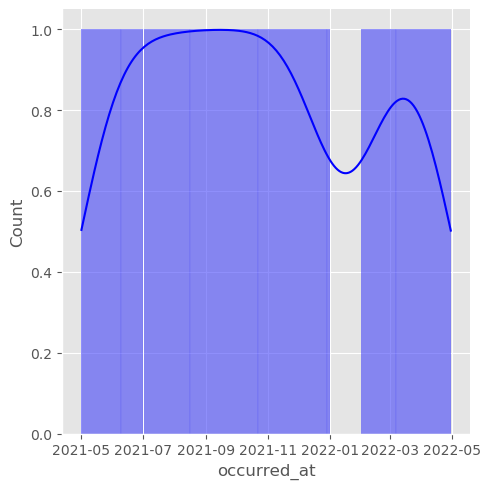

In [27]:
plt.figure(figsize = (20,10))
sb.displot(ocurrent_month, color='b', bins=consumption_total, kde=True)

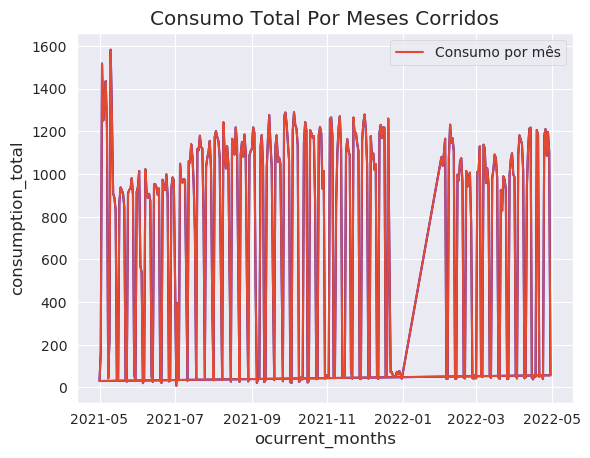

In [33]:
plt.plot(ocurrent_month, consumption_total, color= 'b')
plt.title('Consumo Total Por Meses Corridos')
plt.plot(ocurrent_month, consumption_total, label = 'Consumo por mês')
plt.legend()
plt.xlabel('ocurrent_months')
plt.ylabel('consumption_total')
plt.show()

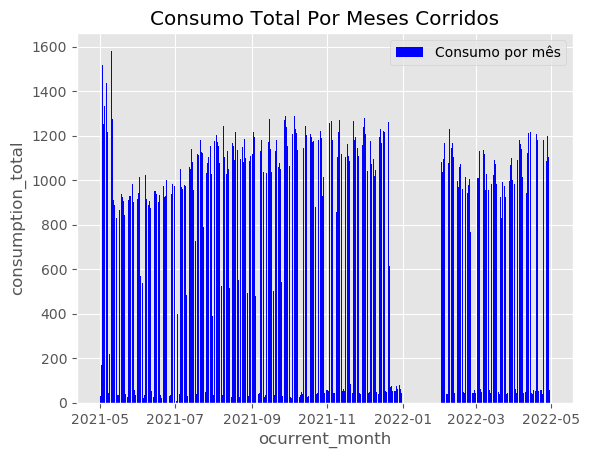

In [29]:
plt.bar(ocurrent_month, consumption_total, label = 'Consumo por mês', color= 'b')
plt.legend()
plt.title('Consumo Total Por Meses Corridos')
plt.xlabel('ocurrent_month')
plt.ylabel('consumption_total')
plt.show()

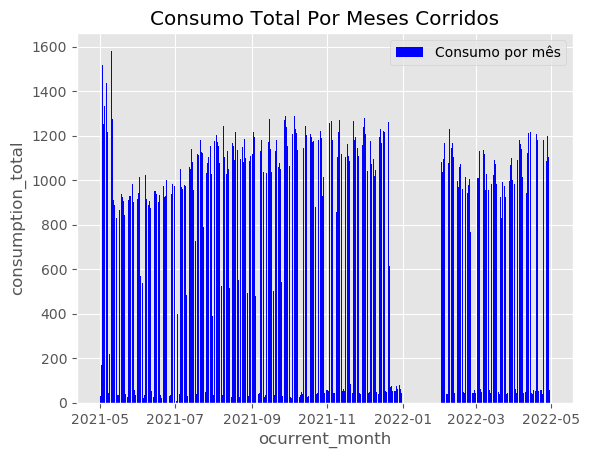

In [30]:
plt.style.use('ggplot')
plt.bar(ocurrent_month, consumption_total, label = 'Consumo por mês', color= 'b')
plt.legend()
plt.title('Consumo Total Por Meses Corridos')
plt.xlabel('ocurrent_month')
plt.ylabel('consumption_total')
plt.show()